In [1]:
import pandas
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from collections import Counter
import time
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
#from keras.utils import to_categorical
import feather
import random
from datetime import *
import warnings
warnings.filterwarnings("ignore")

C:\Users\aufbpc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aufbpc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aufbpc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aufbpc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [13]:
data = feather.read_dataframe("Datasets/combined_data.feather")
data

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,State_WA,State_WI,State_WV,State_WY,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,State_y
0,3,A-3,2.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,0.0,0.0,0.0,0.0,203216.0,85.4,0.4,1.1,64822.0,ohio
1,4,A-4,3.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,0.0,0.0,0.0,0.0,532034.0,82.6,2.6,2.5,49314.0,ohio
2,5,A-5,2.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,0.0,0.0,0.0,0.0,532034.0,82.6,2.6,2.5,49314.0,ohio
3,6,A-6,3.0,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,0.0,0.0,0.0,0.0,1275333.0,81.3,2.3,2.5,58762.0,ohio
4,7,A-7,2.0,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,...,0.0,0.0,0.0,0.0,532034.0,82.6,2.6,2.5,49314.0,ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885011,3291539,A-3513775,2.0,2019-08-23 18:30:23,2019-08-23 18:58:54,34.239100,-118.416200,0.000,At Osborne St/Exit 154 - Accident.,Golden State Fwy N,...,0.0,0.0,0.0,0.0,10098052.0,73.9,6.0,2.7,64251.0,california
2885012,3291540,A-3513776,2.0,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379400,0.543,At Market St - Accident.,Pomona Fwy E,...,0.0,0.0,0.0,0.0,2383286.0,77.8,1.3,1.5,63948.0,california
2885013,3291541,A-3513777,2.0,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148100,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,...,0.0,0.0,0.0,0.0,3302833.0,76.3,2.9,2.9,74855.0,california
2885014,3291542,A-3513778,2.0,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847800,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,...,0.0,0.0,0.0,0.0,3164182.0,78.7,2.0,1.9,85398.0,california


In [15]:
# Remove those one-hot encoded columns in the dataset created by Abhi

def in_name(c, one_hots):
    for col_name in one_hots:
        if c.startswith(f"{col_name}_"):
            return True
    return False

one_hots = ['Wind_Direction', 'Timezone','State', 'Weather_Condition']
remove = [col for col in data.columns if in_name(col, one_hots) and col != "State_y"]
df = data.drop(remove, axis=1)


,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,State_y
0,3,A-3,2.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,1.0,1.0,0.0,0.0,203216.0,85.4,0.4,1.1,64822.0,ohio
1,4,A-4,3.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,1.0,0.0,0.0,0.0,532034.0,82.6,2.6,2.5,49314.0,ohio
2,5,A-5,2.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,0.0,0.0,0.0,0.0,532034.0,82.6,2.6,2.5,49314.0,ohio
3,6,A-6,3.0,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,0.0,0.0,0.0,0.0,1275333.0,81.3,2.3,2.5,58762.0,ohio
4,7,A-7,2.0,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,...,0.0,0.0,0.0,0.0,532034.0,82.6,2.6,2.5,49314.0,ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885011,3291539,A-3513775,2.0,2019-08-23 18:30:23,2019-08-23 18:58:54,34.239100,-118.416200,0.000,At Osborne St/Exit 154 - Accident.,Golden State Fwy N,...,0.0,0.0,0.0,0.0,10098052.0,73.9,6.0,2.7,64251.0,california
2885012,3291540,A-3513776,2.0,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379400,0.543,At Market St - Accident.,Pomona Fwy E,...,0.0,0.0,0.0,0.0,2383286.0,77.8,1.3,1.5,63948.0,california
2885013,3291541,A-3513777,2.0,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148100,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,...,0.0,0.0,0.0,0.0,3302833.0,76.3,2.9,2.9,74855.0,california
2885014,3291542,A-3513778,2.0,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847800,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,...,0.0,0.0,0.0,0.0,3164182.0,78.7,2.0,1.9,85398.0,california


In [16]:
# Remove missing values
df = df.dropna().reset_index(drop=True)
print(len(df))

2818343


In [17]:
df['Severity'] = df['Severity'].astype(int)

# Clean categorical features

### Clean wind direction

* "CALM" = ["Calm", "CALM"]
* "W" = ["W", "West", "WSW", "WNW"] 
* "S" = ["S", "South", "SSW", "SSE"] 
* "N" = ["N", "North", "NNW", "NNE"] 
* "E" = ["E", "East", "ESE", "ENE"]
* "VAR" = ["VAR", "Variable"]

In [18]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' 'CALM']


### Clean weather condition

In [19]:
Counter(df['Weather_Condition'])

Counter({'Overcast': 305921,
         'Mostly Cloudy': 431613,
         'Light Rain': 115879,
         'Light Snow': 34232,
         'Haze': 27192,
         'Scattered Clouds': 170815,
         'Partly Cloudy': 306443,
         'Clear': 595085,
         'Snow': 2834,
         'Light Freezing Drizzle': 615,
         'Fog': 22554,
         'Shallow Fog': 706,
         'Rain': 19900,
         'Light Freezing Rain': 1109,
         'Cloudy': 200462,
         'Heavy Rain': 7836,
         'Smoke': 2725,
         'Patches of Fog': 1455,
         'Mist': 1308,
         'Light Freezing Fog': 386,
         'Light Thunderstorms and Rain': 2935,
         'Light Drizzle': 8389,
         'Thunderstorms and Rain': 1028,
         'Fair': 522042,
         'Fair / Windy': 7009,
         'Light Rain / Windy': 789,
         'Drizzle': 947,
         'Light Rain with Thunder': 1893,
         'Mostly Cloudy / Windy': 3788,
         'Partly Cloudy / Windy': 2417,
         'Thunder in the Vicinity': 2678,
     

https://www.timeanddate.com/weather/glossary.html <br>

**Create features according the different weather conditions** <br>
Scattered clouds, partly cloudy = PARTLY CLOUDY <br>
Overcast, Mostly cloudly, Cloudy = CLOUDY <br>
Fair, Clear = CLEAR <br>
Snow (light snow, heavy snow), and wintry mix  = SNOW <br>
drizzle, light rain/drizzle, light freezing rain/drizzle = LIGHT RAIN <br>
Heavy Rain, heavy thunderstorms, heavy t-storm = HEAVY RAIN <br>
Haze, fog, mist, smoke = fog     *(see https://www.worldatlas.com/articles/what-are-the-differences-between-mist-haze-and-fog.html)*<br>
Rain, light thunderstorms, thunderstorms, t-storm, thunder = RAIN <br>

In [20]:
def get_condition(string):
    
    conditions = ['Clear', 'Partly Cloudy', 'Cloudy', 'Snow', 'Light Rain', 'Heavy Rain', 'Rain', 'Fog'] 
    strings = [['clear', 'fair'],
              ['partly cloudy', 'scattered clouds'],
              ['overcast', 'mostly cloudy', 'cloudy'],
              ['snow', 'wintry mix'],
              ['drizzle', 'light rain', 'light freezing rain'],
              ['heavy rain', 'heavy thunderstorms', 'heavy t-storm'],
              ['rain', 'thunderstorms', 't-storm', 'thunder'],
              ['fog', 'haze', 'mist', 'smoke']]

    for j, k in enumerate(strings):
        for val in k:
            if val in string.lower():
                return conditions[j]
    return 'NONE'

In [21]:
res = []
for i in df['Weather_Condition'].values:
    res.append(get_condition(i))

df['Condition'] = res
df[['Condition', 'Weather_Condition']]

,Condition,Weather_Condition
0,Cloudy,Overcast
1,Cloudy,Mostly Cloudy
2,Cloudy,Mostly Cloudy
3,Light Rain,Light Rain
4,Cloudy,Overcast
...,...,...
2818338,Clear,Fair
2818339,Clear,Fair
2818340,Clear,Fair
2818341,Partly Cloudy,Partly Cloudy


In [22]:
conditions = ['Clear', 'Partly Cloudy', 'Cloudy', 'Snow', 'Light Rain', 'Heavy Rain', 'Rain', 'Fog'] 

for i in conditions:
    print(i, ":")
    print(set(df[df['Condition']==i]['Weather_Condition']))
    print(sum(df['Condition']==i))
    print("\n")
    
# df = df.drop('Weather_Condition', axis=1)

Clear :
{'Fair', 'Fair / Windy', 'Clear'}
1124136


Partly Cloudy :
{'Scattered Clouds', 'Partly Cloudy / Windy', 'Partly Cloudy'}
479675


Cloudy :
{'Cloudy', 'Mostly Cloudy / Windy', 'Cloudy / Windy', 'Overcast', 'Mostly Cloudy'}
945022


Snow :
{'Heavy Snow', 'Light Snow / Windy', 'Wintry Mix', 'Light Snow', 'Snow'}
38950


Light Rain :
{'Light Freezing Rain', 'Light Freezing Drizzle', 'Light Rain / Windy', 'Light Drizzle', 'Light Rain', 'Drizzle', 'Light Rain with Thunder'}
129621


Heavy Rain :
{'Heavy Rain', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain'}
10022


Rain :
{'Rain', 'Thunderstorms and Rain', 'Rain / Windy', 'Thunder in the Vicinity', 'T-Storm', 'Thunderstorm', 'Light Thunderstorms and Rain', 'Thunder'}
34591


Fog :
{'Fog', 'Patches of Fog', 'Light Freezing Fog', 'Mist', 'Smoke', 'Haze', 'Shallow Fog'}
56326




In [23]:
# One hot encode ['Wind_Direction', 'Timezone', 'State', 'Condition']

one_hots = ['Wind_Direction', 'Timezone','State_y', 'Condition']
oh = pd.DataFrame()
for c in one_hots:
    dummies = pd.get_dummies(df[c], prefix=c)
    oh = pd.concat([oh, dummies], axis=1)

df = pd.concat([df, oh], axis=1)

In [27]:
# Save this dataframe
df.to_feather("Datasets/processed_data_v1.feather")

In [30]:
# Filter the data
#BUM NOEXIT ROUNABOUT GIVEWAY removed due to badly distributed data
drop = ['Unnamed: 0', 'ID', 'Start_Lat', 'Start_Lng', 'Start_Time', 'End_Time', 'Weather_Timestamp', 'Description', 
        'City', 'Airport_Code',
        'County_x',
        'Wind_Direction', 'Timezone', 'State_y', 'Condition', 'Weather_Condition',
        'Street', 'Bump', 'No_Exit', 'Roundabout', 'Give_Way', 'Traffic_Calming']

df = df.drop(drop, axis=1).reset_index(drop=True)
# Convert to feather file format
df.to_feather("Datasets/processed_data_v2.feather")
# clears memory allocated to df
del(df)

In [33]:
FILENAME = "processed_data_v2.feather"

In [34]:
df = feather.read_dataframe(FILENAME)
df

,Severity,Distance(mi),Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,State_y_wisconsin,State_y_wyoming,Condition_Clear,Condition_Cloudy,Condition_Fog,Condition_Heavy Rain,Condition_Light Rain,Condition_Partly Cloudy,Condition_Rain,Condition_Snow
0,2,0.010,1.0,36.0,100.0,29.67,10.0,3.5,0.00,0.0,...,0,0,0,1,0,0,0,0,0,0
1,3,0.010,1.0,35.1,96.0,29.64,9.0,4.6,0.00,0.0,...,0,0,0,1,0,0,0,0,0,0
2,2,0.010,1.0,36.0,89.0,29.65,6.0,3.5,0.00,0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,0.010,1.0,37.9,97.0,29.63,7.0,3.5,0.03,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2,0.000,1.0,34.0,100.0,29.66,7.0,3.5,0.00,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818338,2,0.000,1.0,81.0,48.0,28.78,10.0,6.0,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
2818339,2,0.543,1.0,86.0,40.0,28.92,10.0,13.0,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
2818340,2,0.338,1.0,70.0,73.0,29.39,10.0,6.0,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
2818341,2,0.561,1.0,73.0,64.0,29.74,10.0,10.0,0.00,0.0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df = feather.read_dataframe(FILENAME)
one_hots = [ 'State']
remove = [col for col in df.columns if in_name(col, one_hots)]
df = df.drop(remove, axis=1)

df.to_feather("Datasets/{}_Timezone.feather".format(FILENAME))

Index(['Severity', 'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Crossing', 'Junction', 'Railway',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Population_County',
       'Drive_County', 'Transit_County', 'Walk_County',
       'MedianHouseholdIncome_County', 'Wind_Direction_CALM',
       'Wind_Direction_E', 'Wind_Direction_N', 'Wind_Direction_NE',
       'Wind_Direction_NW', 'Wind_Direction_S', 'Wind_Direction_SE',
       'Wind_Direction_SW', 'Wind_Direction_VAR', 'Wind_Direction_W',
       'Timezone_US/Central', 'Timezone_US/Eastern', 'Timezone_US/Mountain',
       'Timezone_US/Pacific', 'Condition_Clear', 'Condition_Cloudy',
       'Condition_Fog', 'Condition_Heavy Rain', 'Condition_Light Rain',
       'Condition_Partly Cloudy', 'Condition_Rain', 'Condition_Snow'],
      dtype='object')

In [37]:
df = feather.read_dataframe(FILENAME)
one_hots = [ 'Timezone']
remove = [col for col in df.columns if in_name(col, one_hots)]
df = df.drop(remove, axis=1)

df.to_feather("Datasets/{}_State.feather".format(FILENAME))

Index(['Severity', 'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Crossing', 'Junction', 'Railway',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Population_County',
       'Drive_County', 'Transit_County', 'Walk_County',
       'MedianHouseholdIncome_County', 'Wind_Direction_CALM',
       'Wind_Direction_E', 'Wind_Direction_N', 'Wind_Direction_NE',
       'Wind_Direction_NW', 'Wind_Direction_S', 'Wind_Direction_SE',
       'Wind_Direction_SW', 'Wind_Direction_VAR', 'Wind_Direction_W',
       'State_y_alabama', 'State_y_arizona', 'State_y_arkansas',
       'State_y_california', 'State_y_colorado', 'State_y_connecticut',
       'State_y_delaware', 'State_y_district of columbia', 'State_y_florida',
       'State_y_georgia', 'State_y_idaho', 'State_y_illinois',
       'State_y_indiana', 'State_

# Model

In [38]:
FILENAME = "processed_data_v2.feather"

In [41]:
data = feather.read_dataframe(FILENAME)
data['Severity'] = data['Severity'].astype(int)

# One hot encode labels
n = len(data)
labels = data['Severity']
y = np.zeros((n, 4))
for i in range(n):
    y[i, labels[i]-1] = 1

# release memory 
del(data)

#### Finding the best number of neurons 

In [44]:
data = feather.read_dataframe(f"{FILENAME}_State.feather")
data = data.drop('Severity', axis=1)

EPOCHS = 10
BATCH_SIZE = 128

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=30034)



model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30, activation=tf.nn.swish,input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(4, activation=tf.nn.sigmoid))

# Compile and print out summary of model
model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])

model.summary()
    
model.fit(np.array(X_train), y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
    
model.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                2730      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 124       
Total params: 2,854
Trainable params: 2,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2113757/2113757 [==============================] - 19s 9us/sample - loss: nan - acc: 0.0094
Epoch 2/10
2113757/2113757 [==============================] - 20s 9us/sample - loss: nan - acc: 0.0094
Epoch 3/10
 312064/2113757 [===>..........................] - ETA: 17s - loss: nan - acc: 0.0094

KeyboardInterrupt: 

In [43]:
data = feather.read_dataframe(f"{FILENAME}_State.feather")
data = data.drop('Severity', axis=1)

EPOCHS = 10
BATCH_SIZE = 128

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=30034)

max_neuron = X_train.shape[1]
num_neurons = range(max_neuron,4,-5)

for i in num_neurons:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(i, activation=tf.nn.swish,input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dense(4, activation=tf.nn.sigmoid))

    # Compile and print out summary of model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                 metrics=['accuracy'])

    model.summary()
    
    model.fit(np.array(X_train), y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
    
    model.evaluate(X_test, y_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                8190      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 364       
Total params: 8,554
Trainable params: 8,554
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
2113757/2113757 [==============================] - 21s 10us/sample - loss: 14.4144 - acc: 0.0992
Epoch 2/10
2113757/2113757 [==============================] - 21s 10us/sample - loss: 14.4144 - acc: 0.0992
Epoch 3/10
2113757/2113757 [==============================] - 21s 10us/sample - loss: 14

KeyboardInterrupt: 

### State and severity 

In [20]:
conditions = ["State","Timezone"]

data = feather.read_dataframe("{}_v2.feather".format(FILENAME))
data['Severity'] = data['Severity'].astype(int)

# One hot encode labels
n = len(data)
labels = data['Severity']
y = np.zeros((n, 4))
for i in range(n):
    y[i, labels[i]-1] = 1
    
data = 0
    

for i in conditions:
    data = feather.read_dataframe(f"{FILENAME}_v2_{i}.feather")
    
    data = data.drop('Severity', axis=1)

    #scaler=MinMaxScaler(feature_range=(0,1))
    #data = scaler.fit_transform(data)
    
    # Get the attributes
    
    
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=30034)
    
    EPOCHS = 10
    BATCH_SIZE = 128

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(30, activation=tf.nn.swish,input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dense(4, activation=tf.nn.sigmoid))

    # Compile and print out summary of model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                 metrics=['accuracy'])

    model.summary()
    
    print("=================================================")
    print("Scale = " + i)
    print("=================================================")
    
    model.fit(np.array(X_train), y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
    
    model.evaluate(X_test, y_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                2610      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 124       
Total params: 2,734
Trainable params: 2,734
Non-trainable params: 0
_________________________________________________________________
Scale = State
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
2163762/2163762 [==============================] - 21s 10us/sample - loss: 0.6512 - acc: 0.6967
Epoch 2/10
2041984/2163762 [===========================>..] - ETA: 1s - loss: 0.6236 - acc: 0.7067

KeyboardInterrupt: 

In [9]:
data = feather.read_dataframe("{}_v2_Timezone.feather".format(FILENAME))
data['Severity'] = data['Severity'].astype(int)

In [10]:
for c in data.columns:
    print(c)

Severity
Distance(mi)
Side
Temperature(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Speed(mph)
Precipitation(in)
Amenity
Crossing
Junction
Railway
Station
Stop
Traffic_Signal
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight
Wind_Direction_CALM
Wind_Direction_E
Wind_Direction_N
Wind_Direction_NE
Wind_Direction_NW
Wind_Direction_S
Wind_Direction_SE
Wind_Direction_SW
Wind_Direction_VAR
Wind_Direction_W
Timezone_US/Central
Timezone_US/Eastern
Timezone_US/Mountain
Timezone_US/Pacific
County_Abbeville
County_Acadia
County_Accomack
County_Ada
County_Adair
County_Adams
County_Addison
County_Aiken
County_Aitkin
County_Alachua
County_Alamance
County_Alameda
County_Alamosa
County_Albany
County_Albemarle
County_Alcona
County_Alcorn
County_Alexander
County_Alexandria
County_Alexandria City
County_Allamakee
County_Allegan
County_Allegany
County_Alleghany
County_Allegheny
County_Allen
County_Allendale
County_Alpena
County_Alpine
County_Amador
County_Amelia
County_Amherst
Count

In [4]:
# One hot encode labels
n = len(data)
labels = data['Severity']
y = np.zeros((n, 4))
for i in range(n):
    y[i, labels[i]-1] = 1
    
# Get the attributes
X = data.drop('Severity', axis=1)

scaler=MinMaxScaler(feature_range=(0,1))
scaled_features = scaler.fit_transform(X)

MemoryError: Unable to allocate 38.2 GiB for an array with shape (1776, 2885016) and data type float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.25, random_state=30034)

In [43]:
EPOCHS = 10
BATCH_SIZE = 128

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30, activation=tf.nn.swish,input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(4, activation=tf.nn.sigmoid))

# Compile and print out summary of model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                2730      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 124       
Total params: 2,854
Trainable params: 2,854
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Train the model

model.fit(np.array(X_train), y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/10
2163762/2163762 [==============================] - 15s 7us/sample - loss: 0.6569 - acc: 0.7009
Epoch 2/10
2163762/2163762 [==============================] - 15s 7us/sample - loss: 0.6396 - acc: 0.7036
Epoch 3/10
2163762/2163762 [==============================] - 15s 7us/sample - loss: 0.6338 - acc: 0.7039
Epoch 4/10
2163762/2163762 [==============================] - 15s 7us/sample - loss: 0.6309 - acc: 0.7036
Epoch 5/10
2163762/2163762 [==============================] - 14s 7us/sample - loss: 0.6294 - acc: 0.7037
Epoch 6/10
2163762/2163762 [==============================] - 14s 7us/sample - loss: 0.6283 - acc: 0.7037
Epoch 7/10
2163762/2163762 [==============================] - 15s 7us/sample - loss: 0.6272 - acc: 0.7040
Epoch 8/10
2163762/2163762 [==============================] - 15s 7us/sample - loss: 0.6262 - acc: 0.7042
Epoch 9/10
2163762/2163762 [==============================] - 15s 7us/sample - loss: 0.6252 - acc: 0.7044
Epoch 10/10
2163762/2163762 [=================

In [81]:
y_pred = model.predict(X_test)
y_pred

array([[7.92860985e-04, 9.06873822e-01, 3.90874147e-02, 2.94327736e-04],
       [4.24820185e-03, 6.54644728e-01, 2.70884842e-01, 2.16426253e-02],
       [1.83792412e-02, 7.98322082e-01, 2.38971114e-01, 7.86313415e-03],
       ...,
       [1.74969435e-04, 7.91782796e-01, 3.45783442e-01, 2.99191475e-03],
       [1.18869543e-03, 9.94852066e-01, 1.96524262e-02, 2.31131911e-03],
       [6.31749630e-04, 8.35505724e-01, 5.55452824e-01, 1.30520165e-02]],
      dtype=float32)

In [45]:
model.evaluate(X_test, y_test)

721254/721254 [==============================] - 8s 11us/sample - loss: 0.6245 - acc: 0.7041


[0.6244824465461103, 0.7040502]

accuracy: 0.7029312835700045


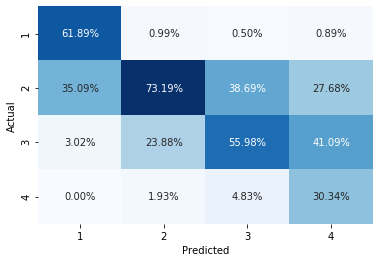

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("accuracy:", accuracy_score(t, p))

p = []
t = []
for i in y_pred:
    p.append(np.argmax(i)+1)

for i in y_test:
    t.append(np.argmax(i)+1)    

cm=confusion_matrix(t,p)
cm = pd.DataFrame(cm, index = [i for i in "1234"],
                  columns = [i for i in "1234"])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
plt.show()

# Feature selection with Chi sqaure and train test model

In [25]:
# Split into train and test set

data = feather.read_dataframe("{}_v2.feather".format(FILENAME))
data['Severity'] = data['Severity'].astype(int)

# One hot encode labels
n = len(data)
labels = data['Severity']
y = np.zeros((n, 4))
for i in range(n):
    y[i, labels[i]-1] = 1
    
# Get the attributes
X = data.drop('Severity', axis=1)

scaler=MinMaxScaler(feature_range=(0,1))
scaled_features = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.25, random_state=30034)

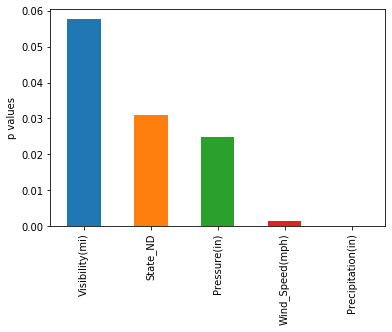

In [132]:
from sklearn.feature_selection import chi2

chi_scores = chi2(scaled_features,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values[:5].plot.bar()
plt.ylabel("p values")
plt.show()

In [46]:
chi = SelectKBest(chi2,k=51)

X_train_chi = chi.fit_transform(X_train,y_train)
X_test_chi = chi.transform(X_test)

In [47]:
EPOCHS = 10
BATCH_SIZE = 128

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30, activation=tf.nn.swish,input_shape=(X_train_chi.shape[1],))) # Swish indeed performs better than sigmoid
model.add(tf.keras.layers.Dense(4, activation=tf.nn.softmax))

# Compile and print out summary of model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
             metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                1560      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 124       
Total params: 1,684
Trainable params: 1,684
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Train the model
model.fit(X_train_chi, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6610 - acc: 0.7001
Epoch 2/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6487 - acc: 0.7025
Epoch 3/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6447 - acc: 0.7029
Epoch 4/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6416 - acc: 0.7035
Epoch 5/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6393 - acc: 0.7038
Epoch 6/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6376 - acc: 0.7043
Epoch 7/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6364 - acc: 0.7047
Epoch 8/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6355 - acc: 0.70510s - loss: 0.6355 - acc
Epoch 9/10
2163762/2163762 [==============================] - 17s 8us/sample - loss: 0.6345 - acc: 0.7053
Epoch 10/10
2163762/216

In [49]:
model.evaluate(X_test_chi,y_test)

721254/721254 [==============================] - 8s 11us/sample - loss: 0.6348 - acc: 0.7055


[0.634770843059254, 0.70546436]